The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


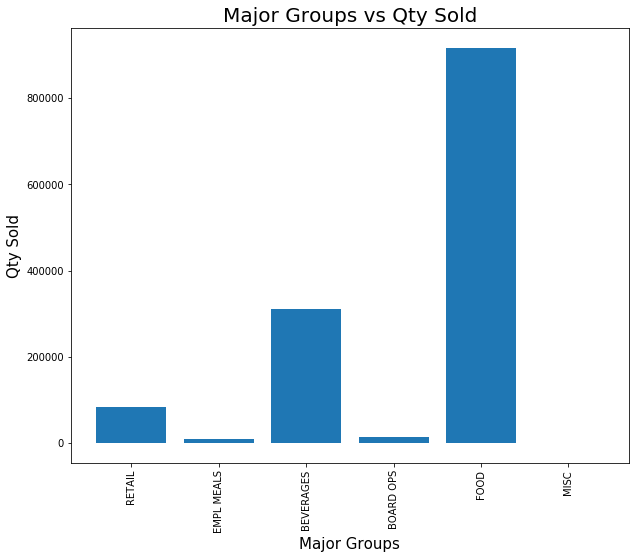

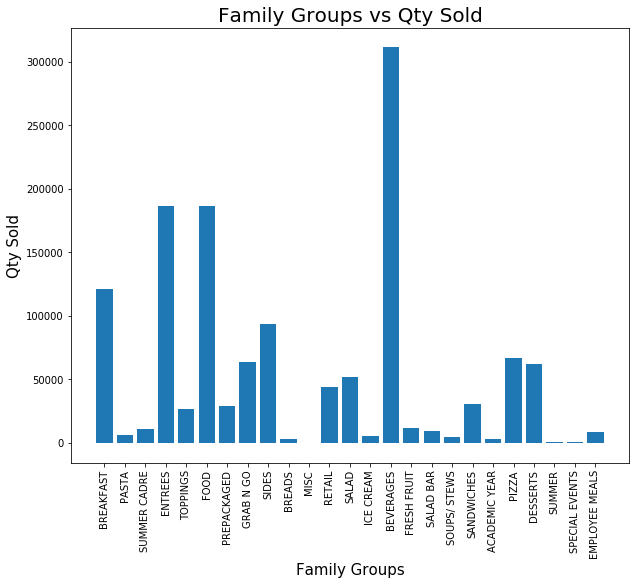

['RETAIL', 'EMPL MEALS', 'BEVERAGES', 'BOARD OPS', 'FOOD', 'MISC']
6 6
[['PREPACKAGED', 'GRAB N GO', 'RETAIL', 'FRESH FRUIT'], ['EMPLOYEE MEALS'], ['BEVERAGES', 'BREAKFAST'], ['SUMMER CADRE', 'SUMMER', 'ACADEMIC YEAR'], ['SALAD', 'BREAKFAST', 'PASTA', 'ICE CREAM', 'ENTREES', 'SALAD BAR', 'PIZZA', 'DESSERTS', 'TOPPINGS', 'FOOD', 'GRAB N GO', 'SIDES', 'PREPACKAGED', 'BREADS', 'SPECIAL EVENTS', 'SOUPS/ STEWS', 'SANDWICHES'], ['MISC']]


In [43]:
import numpy as np
import tensorflow as tf
import csv
import matplotlib.pyplot as plt

#matplotlib figures appear inline in jupyter notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def csv_to_np_arr(train_path) :
    '''
    Read CSV into list of lists
    '''
    with open(train_path, 'r') as f:
        data = list(csv.reader(f, delimiter=','))
        #print(data[:3])
    data_np = np.array(data)
    return data_np

def unique_list(data):
    '''
    Collect all unique elements from an array and return list
    '''
    unique_items = list(set(data))
    return unique_items

def plot(data_x, data_y, xlabel, ylabel, title):
    '''
    Plot graphs of group vs quantity sold
    '''
    idx = np.arange(len(data_x))
    plt.bar(idx, data_y)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(idx, data_x, fontsize=10, rotation=90)
    plt.title(title, fontsize=20)
    plt.show()
    
def matching_indices(data_arr, keyword) :
    '''
    Return indices of data_arr that match keyword/phrase provided
    '''
    idx = []
    for i, x in enumerate(data_arr):
        if x == keyword:
            idx.append(i)
    return idx

def qty_for_grp(grp_data, qty_data) : 
    '''
    Combine qty sold for major/family groups
    '''
    unique_groups = unique_list(grp_data)
    grp_qty = []
    for grp in unique_groups:
        idx = matching_indices(grp_data, grp)
        per_grp_sum = 0
        for i in idx :
            per_grp_sum += qty_data[i]
        grp_qty.append(per_grp_sum)
    return grp_qty

def grouping(grp_data, subgroups):
    unique_groups = unique_list(grp_data)
    g = []
    for grp in unique_groups:
        idx = matching_indices(grp_data, grp)
        g.append(unique([subgroups[i] for i in idx]))
    return g  
    
def main():
    train_path = 'data/f2018.csv'
    data = csv_to_np_arr(train_path)
    
    menu_items = data[1:-1, 0]
    family = data[1:-1, 1]
    major = data[1:-1, 2]
    qty_sold = data[1:-1, 3].astype(int)       #qty_sold as int datatype for plotting and processing
    #plot(menu_items, menu_qty_sold, 'Menu Items', 'Qty Sold', 'Menu Items vs Qty Sold')
    
    mgrp_qty = qty_for_grp(major, qty_sold) 
    unique_major = unique_list(major)
    plot(unique_major, mgrp_qty, 'Major Groups', 'Qty Sold', 'Major Groups vs Qty Sold')
    
    fgrp_qty = qty_for_grp(family, qty_sold) 
    unique_family = unique_list(family)
    plot(unique_family, fgrp_qty, 'Family Groups', 'Qty Sold', 'Family Groups vs Qty Sold')
    
    sublist = grouping(major, family)
    print(unique_major)
    print(len(sublist), len(unique_major))
    print(sublist)
    
if __name__ == '__main__':
    main()